In [1]:
# Importing all necessary libraries
import keras
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras.layers import BatchNormalization,Flatten
from keras.layers import ZeroPadding2D
from keras import backend as K 


Using TensorFlow backend.


In [2]:
train_gen=ImageDataGenerator(rescale=1./255,
                                   featurewise_center=True,
                                   samplewise_center=True,
                                   featurewise_std_normalization=True,
                                   zca_whitening=False,zca_epsilon=1e-06,
                                   rotation_range=40, width_shift_range=0.0,
                                   height_shift_range=(0.0), brightness_range=(0.2,0.2),
                                   shear_range=0.2, zoom_range=0.2,
                                   channel_shift_range=0.0,data_format='channels_last', fill_mode='nearest')

In [3]:
test_gen=ImageDataGenerator(rescale=1./255,
                                   featurewise_center=True,
                                   samplewise_center=True,
                                   featurewise_std_normalization=True,
                                   zca_whitening=False,zca_epsilon=1e-06,
                                   rotation_range=40, width_shift_range=0.0,
                                   height_shift_range=(0.0), brightness_range=(0.2,0.2),
                                   shear_range=0.2, zoom_range=0.2,
                                   channel_shift_range=0.0,data_format='channels_last', fill_mode='nearest')

In [4]:
val_gen=ImageDataGenerator(rescale=1./255,
                                   featurewise_center=True,
                                   samplewise_center=True,
                                   featurewise_std_normalization=True,
                                   zca_whitening=False,zca_epsilon=1e-06,
                                   rotation_range=40, width_shift_range=0.0,
                                   height_shift_range=(0.0), brightness_range=(0.2,0.2),
                                   shear_range=0.2, zoom_range=0.2,
                                   channel_shift_range=0.0,data_format='channels_last', fill_mode='nearest')

In [5]:
data_train = train_gen.flow_from_directory(r"C:\Users\THARUN\Desktop\cell\Train\\",
                                           target_size = (32, 32),
                                           classes = ['Infected','Un-infected'],
                                           class_mode = 'categorical',
                                           batch_size = 64,
                                           seed = 1)


Found 13925 images belonging to 2 classes.


In [6]:
data_test= train_gen.flow_from_directory(r"C:\Users\THARUN\Desktop\cell\Test",
                                           target_size = (32, 32),
                                           classes = ['Infected','Un-infected'],
                                           class_mode = 'categorical',
                                           batch_size = 64,
                                           seed = 1)


Found 1726 images belonging to 2 classes.


In [7]:
data_val= train_gen.flow_from_directory(r"C:\Users\THARUN\Desktop\cell\Validation",
                                           target_size = (32, 32),
                                           classes = ['Infected','Un-infected'],
                                           class_mode = 'categorical',
                                           batch_size = 64,
                                           seed = 1)


Found 13925 images belonging to 2 classes.


In [18]:
model=Sequential()

In [19]:

model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1),input_shape= (32, 32, 3), padding='SAME',
                 activation =  'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.3))

#CONV2
model.add(ZeroPadding2D(padding = (2, 2)))
model.add(Conv2D(5, kernel_size=(3, 3), strides=(1, 1), padding='SAME',
                 activation =  'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.3))

#CONV3
model.add(ZeroPadding2D(padding = (2, 2)))
model.add(Conv2D(3, kernel_size=(2, 2), strides=(1, 1), padding='SAME',
                 activation =  'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.3))

#CONV4
model.add(ZeroPadding2D(padding = (2, 2)))
model.add(Conv2D(3, kernel_size=(2, 2), strides=(1, 1), padding='SAME',
                 activation =  'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

#CONV5
model.add(ZeroPadding2D(padding = (2, 2)))
model.add(Conv2D(3, kernel_size=(2, 2), strides=(1, 1), padding='SAME',
                 activation =  'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1), padding = 'SAME'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))

#FLATTEN
model.add(Flatten())

#Dense1
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

#Dense2
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.3))

#Dense3
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))

#Dense4
model.add(Dense(2, activation='sigmoid'))

#model summary
model.summary()

#Optimizers
#Ad = Adam(lr = 0.01)
#Compile Model
model.compile(optimizer = "adam",
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

#Fitting Model
history = model.fit_generator(data_train, steps_per_epoch=100,
                    epochs=30, validation_data=data_val,
                    validation_steps=30)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
zero_padding2d_9 (ZeroPaddin (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 36, 36, 5)         1445      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 5)        

100/100 [==============================] - 91s 907ms/step - loss: 0.0647 - accuracy: 0.9889 - val_loss: 0.0814 - val_accuracy: 0.9911
Epoch 24/30
100/100 [==============================] - 129s 1s/step - loss: 0.0629 - accuracy: 0.9881 - val_loss: 0.1209 - val_accuracy: 0.9906
Epoch 25/30
100/100 [==============================] - 126s 1s/step - loss: 0.0571 - accuracy: 0.9901 - val_loss: 0.3014 - val_accuracy: 0.9901
Epoch 26/30
100/100 [==============================] - 126s 1s/step - loss: 0.0648 - accuracy: 0.9894 - val_loss: 0.0036 - val_accuracy: 0.9901
Epoch 27/30
100/100 [==============================] - 127s 1s/step - loss: 0.0666 - accuracy: 0.9872 - val_loss: 0.0019 - val_accuracy: 0.9880
Epoch 28/30
100/100 [==============================] - 128s 1s/step - loss: 0.0610 - accuracy: 0.9873 - val_loss: 0.2224 - val_accuracy: 0.9896
Epoch 29/30
100/100 [==============================] - 126s 1s/step - loss: 0.0647 - accuracy: 0.9895 - val_loss: 0.0025 - val_accuracy: 0.9885
Ep

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


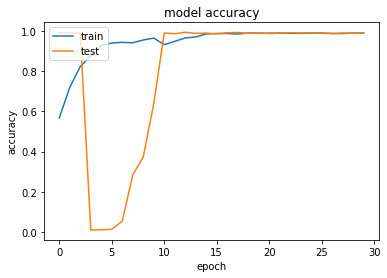

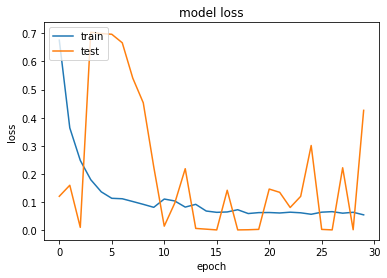

C:\Users\THARUN\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\THARUN\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Accuracyloss:- 0.5971782207489014
AccuracyScore 0.9169533848762512


In [21]:
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


#Evaluating Model
score  = model.evaluate_generator(data_test, 
                                  steps = 100)


#printAccuracy
print("Accuracyloss:-", score[0])
print("AccuracyScore",score[1] )


model.save("model.h5")